In [19]:
%pylab inline
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


In [0]:
def kob(x, a, d):
  return x**3*a + d

In [21]:
# accessing drive files, yey!
from google.colab import drive
drive.mount('/content/gdrive')

import os
os.chdir("gdrive/My Drive/Colab Notebooks/halProg/Mszorzás időmérés")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


FileNotFoundError: ignored

In [30]:
!ls

 matrixMultipTimes16.png   matrixMultipTimes.png   timesOfMulti32.txt
 matrixMultipTimes1.png   'mszorzás idők.ipynb'
 matrixMultipTimes32.png   timesOfMulti1.txt


In [0]:
def feldolg(name, trialNum):
  #file-ból adat beolvasása
  with open(name) as f:
      sorok = f.readlines()
  #adatfeldolgozás
  sizeNs = []
  times = []
  for sor in sorok:
    data = sor.split()
    sizeNs.append(int(data[0]))
    times.append(double(data[1]))
  #ellenőrzésképp kiíratás
  numOfMeas = len(sizeNs)
  print(numOfMeas)  
  print(sizeNs[:10])
  print(times[:10])

  #köbös görbe illesztése
  popt, pcov = curve_fit(kob, sizeNs, times)
  appr = []
  for size in sizeNs:
    appr.append(kob(size, *popt))
    
  #ábrázolás
  fig1 = figure(figsize=(8,5))
  plot(sizeNs, times, 'o-', label=("mérési pontok, melyek "+str(trialNum)+" mérés minimumai"))  
  plot(sizeNs, appr, 'r-', label=(r"köbös illesztés $(ax^3+d)$:" + "\n a=%5.3f, d=%5.3f" % tuple(popt)))
  legend()
  title("mátrixszorzás művelet ideje")
  xlabel("N (mátrix mérete: NxN)")
  ylabel("t [mikroszekundum]") 

  #ábra mentése
  fig1.savefig(("matrixMultipTimes"+str(trialNum)+".png"), dpi=None, facecolor='w', edgecolor='w',
          orientation='portrait', papertype=None, format=None,
          transparent=False, bbox_inches=None, pad_inches=0.1,
          frameon=None, metadata=None)

129
[2, 6, 10, 14, 18, 22, 26, 30, 34, 38]
[0.761, 1.142, 3.424, 4.946, 9.131, 14.458, 22.829, 33.101, 47.939, 68.865]


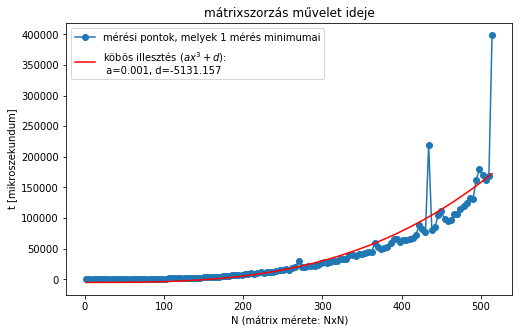

In [43]:
feldolg("timesOfMulti1.txt",1)

In [0]:
#feldolg("timesOfMulti16.txt",16)

129
[2, 6, 10, 14, 18, 22, 26, 30, 34, 38]
[0.38, 0.761, 2.282, 4.565, 8.751, 14.077, 22.068, 32.72, 46.037, 64.3]


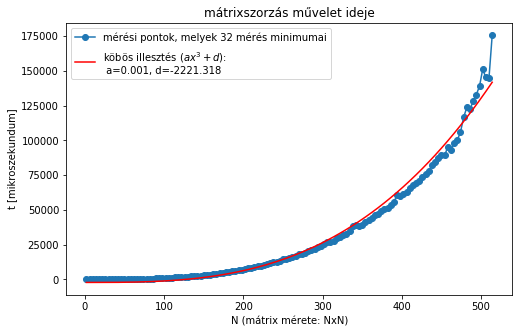

In [45]:
feldolg("timesOfMulti32.txt",32)